<a href="https://colab.research.google.com/github/SBANTHIYA/ASSIGNMENT2-SBANTHIYA/blob/master/SBanthiya2015_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAP 5768 - Data Science - Dr. Marques - Fall 2020

# Assignment 4: Machine Learning

**By Swati Banthiya**

In this assignment I have attempted to answer all questions as per the guide shared with me on Google Colab. I have attempted the bonus question. I have also attempted to use code to make the data neater and more meaningful where possible.



### Goals 

- To learn how to implement a Data Science / Machine Learning workflow in Python (using Pandas, Scikit-learn, Matplotlib, and Numpy)
- To learn how to use perform linear regression by least squares using Python and scikit-learn.
- To appreciate that the same linear regression coefficients may be the best fit for dramatically different data distributions -- as illustrated by the Anscombe's quartet.
- To practice with different types of regularization (*lasso* and *ridge*) and understand when to use them.
- To learn how to implement several different machine learning classification models in Python 
- To learn how to evaluate and fine-tune the performance of a model using cross-validation
- To learn how to test a model and produce a set of plots and performance measures
- To expand upon the prior experience of manipulating, summarizing, and visualizing representative datasets  in data science and machine learning

### Instructions

- This assignment is structured in 3 parts, each using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- **The number of points is indicated next to each part. They add up to 100.**
- **There are additional (10 points worth of) bonus items**, which are, of course optional. 

### Important

- For the sake of reproducibility, use `random_state=0` (or equivalent) in all functions that use random number generation.
- It is OK to attempt the bonus points, but please **do not overdo it!** 


---------
### Imports + Google Drive

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=d9b5b717d672b57e38304d0e4e9339eb55806c3e771db0d610756d061373ee49
  Stored in directory: /tmp/pip-ephem-wheel-cache-8k7gm_1k/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
import scipy.stats as ss
from pandas_profiling import ProfileReport

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Loading the fertility data
df = pd.read_csv('/content/drive/My Drive/data/female_literacy_fertility.csv') 
print(df.count())

Country            162
Continent          162
female literacy    162
fertility          162
population         162
dtype: int64


## Part 1: Regression Analysis


-----------
### 1a. Linear regression by least squares

In this part, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the *illiteracy* rate.

The Python code below plots the fertility versus illiteracy and computes the Pearson correlation coefficient. The Numpy array `illiteracy` has the illiteracy rate among females for most of the world's nations. The array `fertility` has the corresponding fertility data.

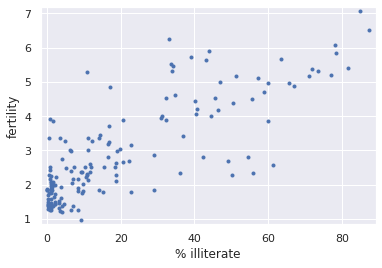

Pearson correlation coefficient between illiteracy and fertility: 0.80413


In [7]:

illiteracy = 100 - df['female literacy']
fertility = df['fertility']

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('% illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print('Pearson correlation coefficient between illiteracy and fertility: {:.5f}'.format(pearson_r(illiteracy, fertility)))

### 1.1 Your turn! (5 points)

We will assume that fertility is a linear function of the female illiteracy rate: `f=ai+b`, where `a` is the slope and `b` is the intercept. 

We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. 

The slope tells us how the fertility rate varies with illiteracy. 
We can find the best fit line .

Write code to plot the data and the best fit line (using `np.polyfit()`) and print out the slope and intercept.

**ANSWER 1.1**

Slope or how fertility varies with literacy is :  0.0498
Slope intercept or minimal fertility rate is   :  1.8881


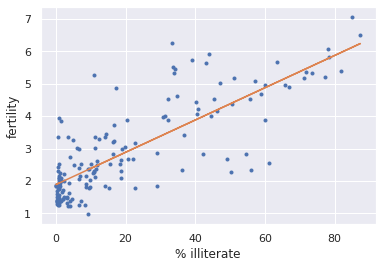

In [9]:
# Answer 1.1

illiteracy = 100 - df['female literacy']
fertility = df['fertility']


a,b = np.polyfit(illiteracy,fertility,1)
print("Slope or how fertility varies with literacy is : ",a.round(4))
print("Slope intercept or minimal fertility rate is   : ",b.round(4))
coef = np.polyfit(illiteracy,fertility,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is used as function which takes in x and returns an estimate for y

plt.xlabel('% illiterate')
plt.ylabel('fertility')
plt.plot(illiteracy,fertility, marker='.', linestyle='none')
plt.plot(illiteracy, poly1d_fn(illiteracy))

-------------------
### 1b. Anscombe's quartet

The Anscombe's quartet is a collection of four small data sets that have nearly identical simple descriptive statistics, yet have very different distributions. Each dataset consists of 11 `(x,y)` points. The quartet was created in 1973 by the statistician Francis Anscombe to demonstrate: the importance of visualization and exploratory data analysis (EDA), the effect of outliers and other influential observations on statistical properties, and the limitations of summary statistics (\*).

(\*) See https://heap.io/blog/data-stories/anscombes-quartet-and-why-summary-statistics-dont-tell-the-whole-story if you're interested.

The Python code below performs a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

In [10]:
x1 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y1 = [8.04, 6.95, 7.58,  8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y2 = [9.14, 8.14, 8.74,  8.77, 9.26, 8.10, 6.13, 3.10, 9.13,  7.26, 4.74]

x3 = [10.0, 8.0,  13.0,  9.0,  11.0, 14.0, 6.0,  4.0,  12.0,  7.0,  5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15,  6.42, 5.73]

x4 = [8.0,  8.0,  8.0,   8.0,  8.0,  8.0,  8.0,  19.0,  8.0,  8.0,  8.0]
y4 = [6.58, 5.76, 7.71,  8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

slope = 0.5000909090909095
intercept = 3.000090909090909


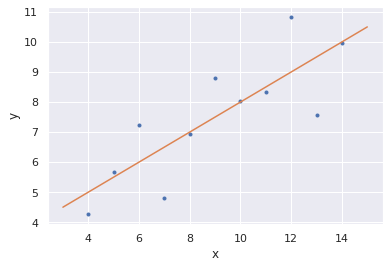

In [11]:
# Perform linear regression: a, b
a, b = np.polyfit(x1, y1, 1)

# Print the slope and intercept
print('slope =', a)
print('intercept =', b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x1, y1, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

### 1.2 Your turn! (5 points)

### Linear regression on all Anscombe data

Write code to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, i.e. compute the slope and intercept for each set. 

The data are stored in lists (`anscombe_x = [x1, x2, x3, x4]` and `anscombe_y = [y1, y2, y3, y4]`), corresponding to the $x$ and $y$ values for each Anscombe data set.

**Answer 1.2**

**Step 1:** Computing slope and intercept for each set

**Step 2:** Verify that slope and intercept for each set are EQUAL


    Dataset 1 With x1  and y1
slope = 0.5
intercept = 3.0


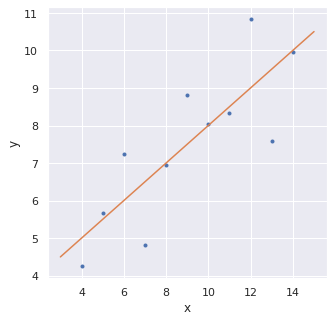


    Dataset 2 With x2  and y2
slope = 0.5
intercept = 3.0


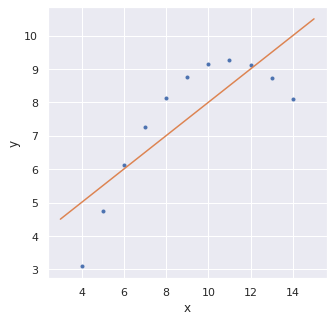


    Dataset 3 With x3  and y3
slope = 0.5
intercept = 3.0


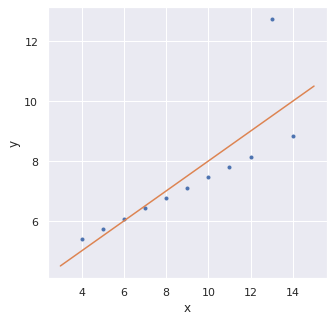


    Dataset 4 With x4  and y4
slope = 0.5
intercept = 3.0


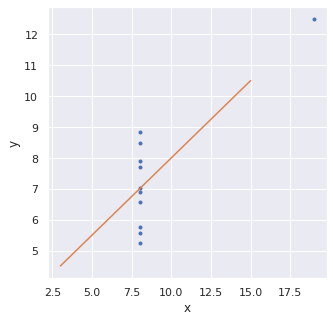

In [16]:
anscombe_x = [x1, x2, x3, x4]
anscombe_y = [y1, y2, y3, y4]

# #           STEP 1  - Computing slope and intercept for each set  
plt.rcParams["figure.figsize"] = (5,5)

slope_list=[]
intercept_list=[]
i=1

for x, y in zip(anscombe_x, anscombe_y):
    print('''
    Dataset''',i,"With x"+str(i)," and y"+str(i))
# Perform linear regression: a, b
    a, b = np.polyfit(x,y, 1)
    slope_list.append(a)
    intercept_list.append(b)

# Print the slope and intercept
    print('slope =', a.round(2))
    print('intercept =', b.round(2))

    x_theor = np.array([3,15])
    y_theor = a * x_theor + b

    plt.plot(x, y, marker='.', linestyle='none')
    plt.plot(x_theor, y_theor)
    
    plt.xlabel('x')
    plt.ylabel('y')
    
    plt.show()
    i=i+1



In [17]:
# STEP 2 Verify that slope and intercept for each set are "Approximately (2 decimal places)" EQUAL

# Rounding slope and intercept values to two decimal places
myRoundedSlopeList =  [round(x,2) for x in slope_list] 
myRoundedInterceptList =  [round(x,2) for x in intercept_list] 

# all elements in a list are identical 
def check(myRoundedSlopeList): 
    return all(i == myRoundedSlopeList[0] for i in myRoundedSlopeList) 

# all elements in a list are identical 
def check(intercept_list): 
    return all(i == myRoundedInterceptList [0] for i in myRoundedInterceptList ) 

print('''
Slope for each dataset are 'Approximately (2 decimal places)' EQUAL      :''',check([myRoundedSlopeList]))
print("Intercept for each dataset are 'Approximately (2 decimal places)' EQUAL  :",check(myRoundedInterceptList ))


Slope for each dataset are 'Approximately (2 decimal places)' EQUAL      : True
Intercept for each dataset are 'Approximately (2 decimal places)' EQUAL  : True


-------------------
### 1c. Regression using scikit-learn

Now that we know the basics of linear regression, we will switch to scikit-learn, a powerful, workflow-oriented library for data science and machine learning.

The Python code below shows a simple linear regression example using scikit-learn. Note the use of the `fit()` and `predict()` methods.

[2.9776566]
-1.903310725531119


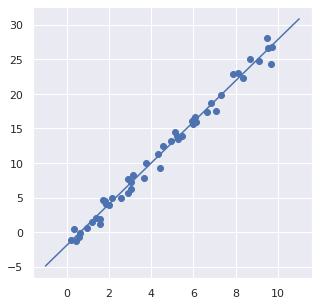

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data around the y = ax+b line where a=3 and b=-2
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 3 * x - 2 + rng.randn(50)

from sklearn.linear_model import LinearRegression

# Note: If you get a "ModuleNotFoundError: No module named 'sklearn'" error message, don't panic.
# It probably means you'll have to install the module by hand if you're using pip. 
# If you're using conda, you should not see any error message.

model = LinearRegression(fit_intercept=True)

X = x[:, np.newaxis]
X.shape

model.fit(X, y)
print(model.coef_)
print(model.intercept_)

xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

### 1d. Polynomial regression

One way to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take the multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

The code below shows a simple example of polynomial regression using the ``PolynomialFeatures`` transformer in scikit-learn. Concretely, it shows how we can use polynomial features with a polynomial of degree seven, i.e. $$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots + a_7 x^7$$ 

It also introduces the notion of a *pipeline* in scikit-learn. "The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters." (https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) 

The R^2 score for the fit is:  0.9806993128749489


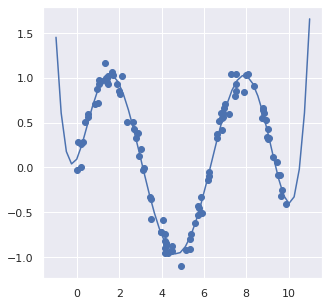

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

print('The R^2 score for the fit is: ', poly_model.score(x[:, np.newaxis], y))

Our linear model, through the use of 7th-order polynomial basis functions, can provide an excellent fit to this non-linear data!

### 1.3 Your turn! (10 points)

Write code to find the best degree/order for the polynomial basis functions (between 1 and 15) by computing the quality of the fit using a suitable metric, in this case the $R^2$ coefficient (which can be computer using the `score()` function). 

Remember that **the best possible score is 1.0**. The score can be negative (because the model can be arbitrarily worse). A score of 0 suggests a constant model that always predicts the expected value of y, disregarding the input features.

Hint: If you plot the score against the degree/order of the polynomial, you should see something like this:
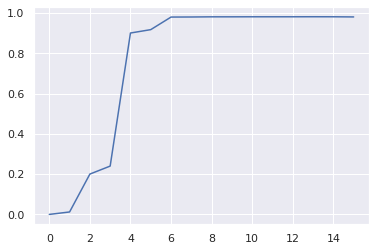


**Answer 1.3**

Objective is to compute the score for each degree from 1 to 15.

**Step 1**: Compute R2 for each order from 1 to 15 and plot their graphs

**Step 2**: Plot the score against the degree/order of the polynomial

R2 Score for polynomial degree 1 is: 0.012172236970290575
R2 Score for polynomial degree 2 is: 0.20041267204540536
R2 Score for polynomial degree 3 is: 0.24010264456793462
R2 Score for polynomial degree 4 is: 0.9010949501596228
R2 Score for polynomial degree 5 is: 0.9178981253300205
R2 Score for polynomial degree 6 is: 0.9803546774621197
R2 Score for polynomial degree 7 is: 0.9806993128749489
R2 Score for polynomial degree 8 is: 0.9815395575076654
R2 Score for polynomial degree 9 is: 0.9815556828827722
R2 Score for polynomial degree 10 is: 0.9817554326412768
R2 Score for polynomial degree 11 is: 0.981759386142972
R2 Score for polynomial degree 12 is: 0.9817630665937364
R2 Score for polynomial degree 13 is: 0.9819417769966973
R2 Score for polynomial degree 14 is: 0.9817712069108879
R2 Score for polynomial degree 15 is: 0.9810106927307878


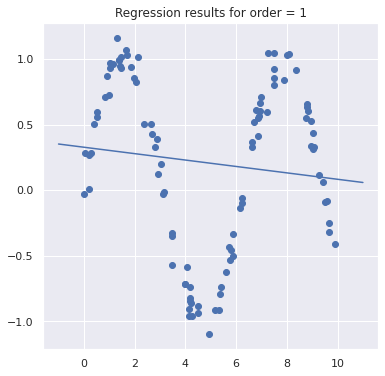

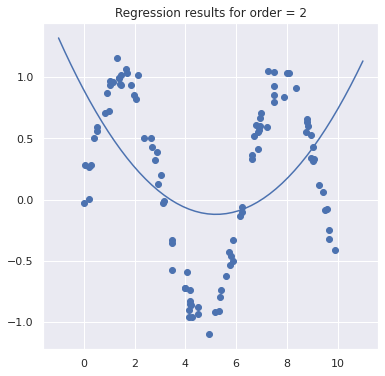

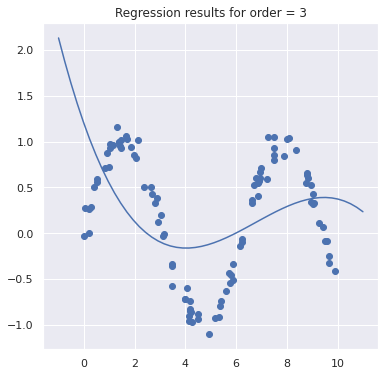

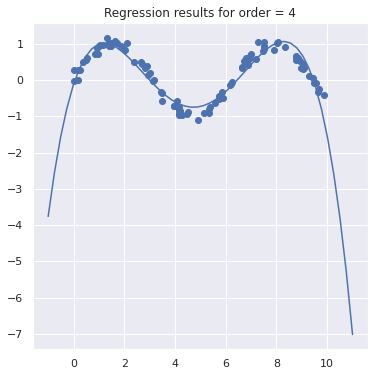

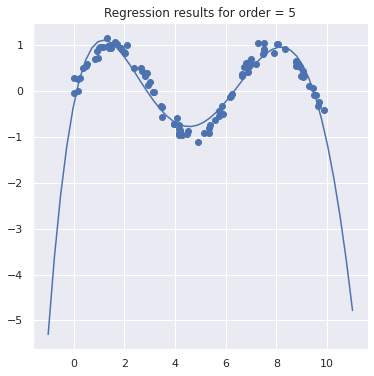

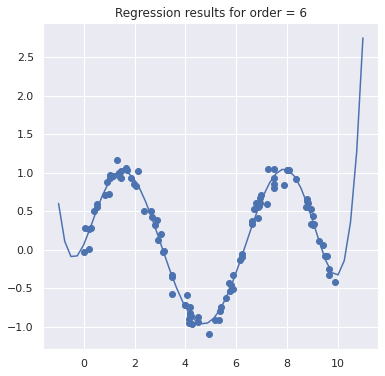

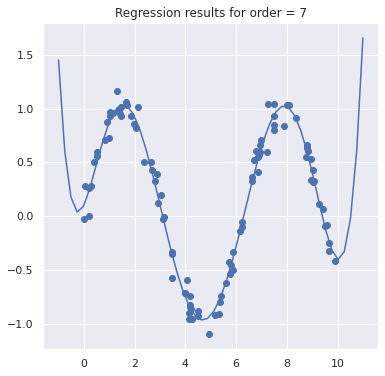

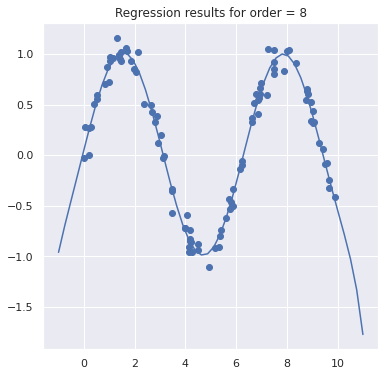

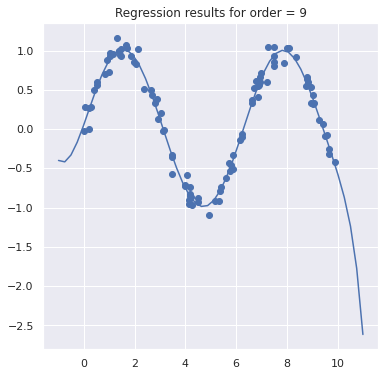

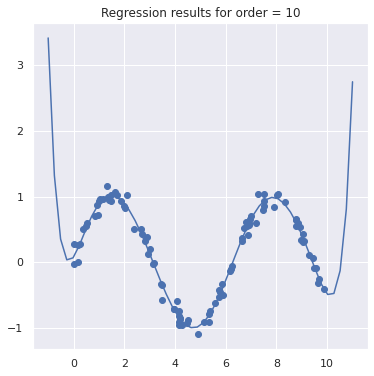

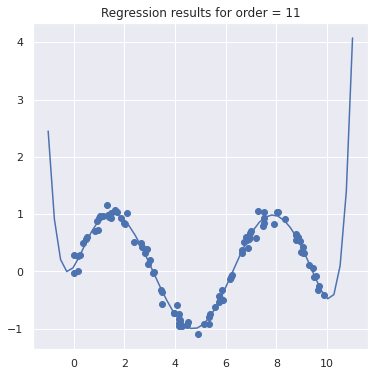

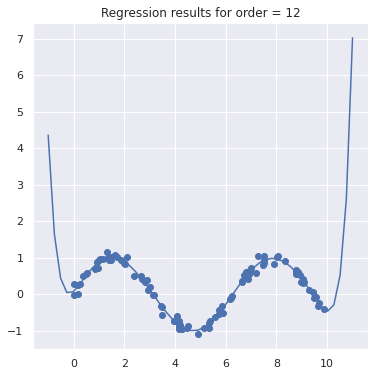

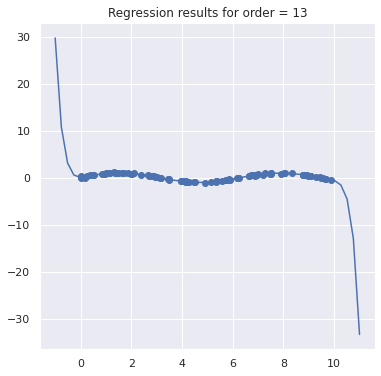

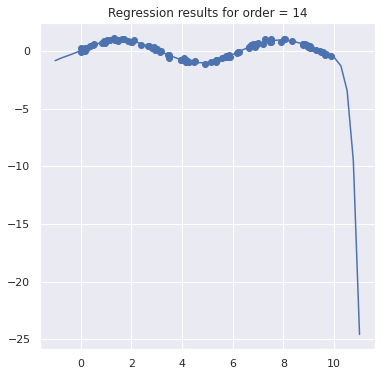

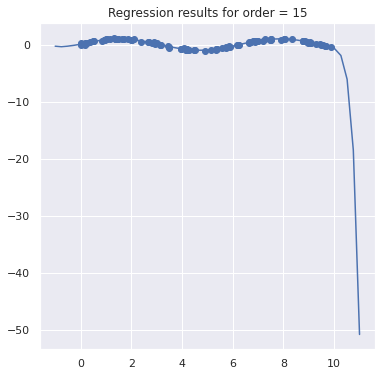

In [26]:
#Step 1: Compute R2 for each order from 1 to 15 and plot their graphs

rng = np.random.RandomState(1)
x = 10 * rng.rand(100)
y = np.sin(x) + 0.1 * rng.randn(100)

max_degree = 15
score = np.zeros(max_degree+1)
for order in range(1,max_degree+1):
    poly_model = make_pipeline(PolynomialFeatures(order), LinearRegression())

    poly_model.fit(x[:, np.newaxis], y)
    yfit= poly_model.predict(xfit[:, np.newaxis])

    plt.figure(order)
    plt.title("Regression results for order = "+str(order))
    plt.scatter(x,y)
    plt.plot(xfit, yfit);
    score[order]= poly_model.score(x[:, np.newaxis], y)
    print('''R2 Score for polynomial degree {} is: {}'''.format(order,score[order]))


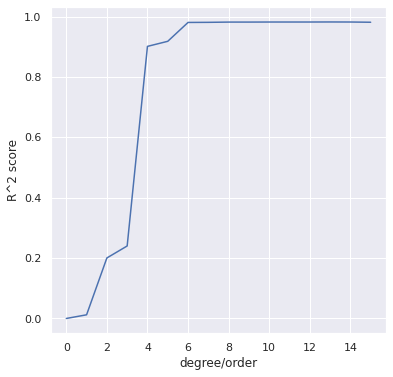

In [21]:
#answer 1.3 continued

#Step 2: Plot the score against the degree/order of the polynomial

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

plt.rcParams["figure.figsize"] = (6,6)

#define function to calculate score based on order

def scores_based_on_degree(order):
    poly_model = make_pipeline(PolynomialFeatures(order),LinearRegression())
    rng = np.random.RandomState(1)
    x = 10 * rng.rand(100)
    y = np.sin(x) + 0.1 * rng.randn(100)
    poly_model.fit(x[:, np.newaxis], y)
    return poly_model.score(x[:, np.newaxis], y)    #using score function

# order can range from 1 to 15 
# Add for loop to calculate scores for various degrees by calling above function
scores_list=[]
for order in range(16):
    scores_list.append(scores_based_on_degree(order))


plt.xlabel('degree/order')
plt.ylabel('R^2 score')    
plt.plot(scores_list)

### 1e. Regularization

The use of polynomial regression with high-order polynomials can very quickly lead to over-fitting. In this part, we will look into the use of regularization to address potential overfitting.

The code below shows an attempt to fit a 15th degree polynomial to a sinusoidal shaped data. The fit is excellent ($R^2$ > 0.98), but might raise suspicions that it will lead to overfitting.

0.9810106927307878


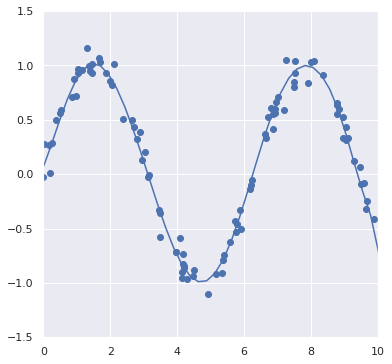

In [27]:
model = make_pipeline(PolynomialFeatures(15),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

score = poly_model.score(x[:, np.newaxis], y)
print(score)

### 1.4 Your turn! (5 points)

Write Python code to perform Ridge regression ($L_2$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Ridge`` estimator. 
2. In the beginning, use all default values for its parameters.
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

**Hint from Professor**

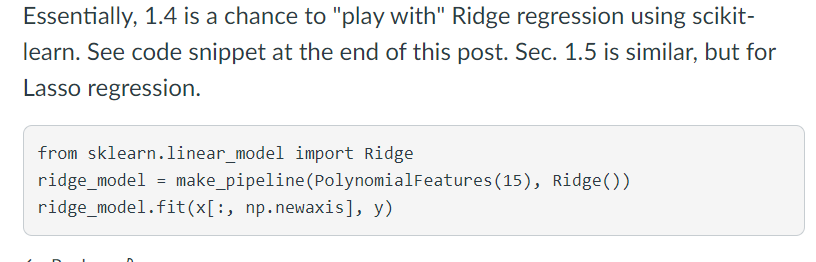




**Answer 1.4**

**Step 1**: Use all default values for its parameters to perform Ridge regression ( L2  Regularization), plot the resulting fit, and compute the  R2  score.

By default, alpha = 1 as per https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html


**Step 2**: After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

R2 Scores is: 0.9788162291858987


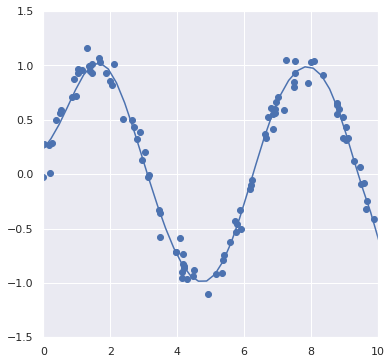

In [41]:
# answer 1.4

# Step 1: Use all default values for its parameters to perform Ridge regression 
#( L2  Regularization), plot the resulting fit, and compute the  R2  score.

from sklearn.linear_model import Ridge

ridge_model = make_pipeline(PolynomialFeatures(15),Ridge())
ridge_model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, ridge_model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

ridge_score = ridge_model.score(x[:, np.newaxis], y)
print("R2 Scores is:", ridge_score)

**Answer 1.4 continued**

**Step 2:** After you get your code to work, spend some time trying to fine-tune the model, 
i.e., experimenting with the regularization parameters.

As per https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/
"as the value of alpha increases, the model complexity reduces." The site describes  α (alpha) as a parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients.

To choose an optimal alpha value the website recommends the cross-validation technique "RidgeCV()" in the scikit learn which uses the value of alpha iterated over a range of values and the one giving higher cross-validation score is chosen.

Hence in the next step I use the RidgeCV() function which adds cross validation to the ridge regression function.

R2 Score with cross validation is: 0.9808793389082331
R2 score improved from 0.9788162291858987  to  0.9808793389082331


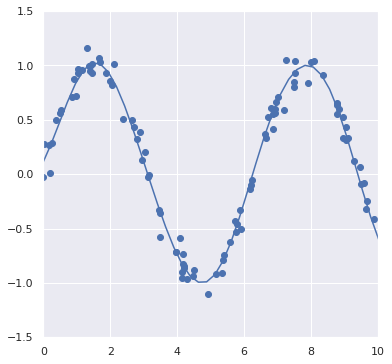

In [42]:
# answer 1.4

# Step 2: After you get your code to work, spend some time trying to fine-tune the model, 
#i.e., experimenting with the regularization parameters.

from sklearn.linear_model import RidgeCV

ridgeCV_model = make_pipeline(PolynomialFeatures(15),RidgeCV( [0.1, 0.5, 1.2, 2.0, 3.0],cv=2))
ridgeCV_model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, ridgeCV_model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

ridgeCV_score = ridgeCV_model.score(x[:, np.newaxis], y)
print("R2 Score with cross validation is:", ridgeCV_score)
print("R2 score improved from", ridge_score," to ",ridgeCV_score)



### 1.5 Your turn! (5 points)

Write Python code to perform Lasso regression ($L_1$ Regularization), plot the resulting fit, and compute the $R^2$ score.

Hints: 
1. This type of penalized model is built into Scikit-Learn with the ``Lasso`` estimator. 
2. In the beginning, use `Lasso(alpha=0.1, tol=0.2)`
3. After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

**Answer 1.5**

**Step 1**: use Lasso(alpha=0.1, tol=0.2) to perform Lasso regression ( L1  Regularization), plot the resulting fit, and compute the  R2  score.

**Step 2**:  Fine-tune the model, i.e., experimenting with the regularization parameters.

R2 Scores is: 0.6754347956467595


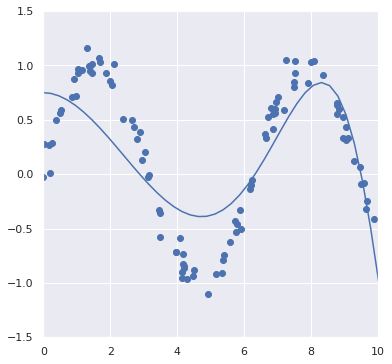

In [43]:
# answer 1.5

# Step 1: use Lasso(alpha=0.1, tol=0.2) to perform Lasso regression ( L1 Regularization), 
#plot the resulting fit, and compute the R2 score.

from sklearn.linear_model import Lasso

lasso_model = make_pipeline(PolynomialFeatures(15),Lasso(alpha=0.1, tol=0.2))
lasso_model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, lasso_model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

lasso_score = lasso_model.score(x[:, np.newaxis], y)
print("R2 Scores is:", lasso_score)

**Answer 1.5 continued**

**Step 2**: After you get your code to work, spend some time trying to fine-tune the model, i.e., experimenting with the regularization parameters.

As per https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/ , additional parameters of importance defined in Lasso function – ‘max_iter' and the 'tol'

Hence, I have played around with alpha, max_iter and tol to answer the question, using the CV option for lasso as well.

**OBSERVATION**: It was observed that decreasing the tolerance 'tol'and increasing the maximum iterations improved the R2 score to certain point, after which the improvements became negligible. Number of folds and alpha values did not have such a great impact compared to the 'tol' and 'max_iter'.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.734710875657173, tolerance: 3.3080709731621254e-05
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.630379991048622, tolerance: 3.3080709731621254e-05
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.899969901614919, tolerance: 3.3080709731621254e-05
  tol, rng, random, positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might

R2 Scores is: 0.8697444224274138
R2 score improved from 0.6754347956467595  to  0.8697444224274138


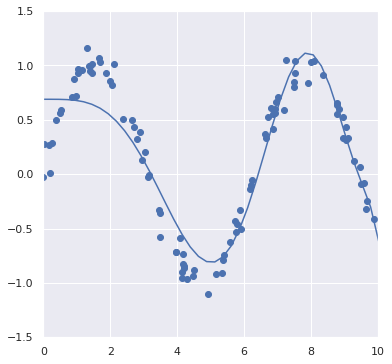

In [46]:
# answer 1.5

# Step 2: Experimenting with alpha, tol and max_iter values with cross validation also.

from sklearn.linear_model import LassoCV

lassoCV_model = make_pipeline(PolynomialFeatures(15),LassoCV(alphas=[0.1, 0.5, 1.2, 2.0, 5.0], tol=0.000001, max_iter=500000,cv=5))
lassoCV_model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, lassoCV_model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

lassoCV_score = lassoCV_model.score(x[:, np.newaxis], y)
print("R2 Scores is:", lassoCV_score)
print("R2 score improved from", lasso_score," to ",lassoCV_score)

### 1f. The housing problem
The Boston housing dataset is a classic dataset used in linear regression examples.
(See https://scikit-learn.org/stable/datasets/index.html#boston-dataset for more)

The Python code below:
- Loads the Boston dataset (using scikit-learn's `load_boston()`) and converts it into a Pandas dataframe
- Selects two features to be used for fitting a model that will then be used to make predictions: LSTAT (% lower status of the population) and RM (average number of rooms per dwelling) (\*)
- Splits the data into train and test sets

(\*) See https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155 for details.

In [47]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
boston['MEDV'] = boston_dataset.target
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
y = boston['MEDV']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


#### (OPTIONAL EDA)

The (innocent-looking) lines of code below use Pandas Profiling to produce rich reports, plots and insights on the dataset.

Read more about it:

*   https://pypi.org/project/pandas-profiling/ 
*   https://www.datacourses.com/pandas-1150/ 
*   https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html 
*   https://medium.com/analytics-vidhya/pandas-profiling-5ecd0b977ecd  

In [49]:
# fun with pandas_profiling
profile = ProfileReport(boston, title='Pandas Profiling Report for Boston Housing Dataset', explorative=True)

In [50]:
#for reference 
#profile.to_notebook_iframe()

### 1.6 Bonus! (10 points)

Write Python code to:

1. Fit a linear model to the data.
2. Compute and print the RMSE and $R^2$ score for both train and test datasets.
3. Fit a polynomial model (of degree 4) to the data.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.
5. Apply Ridge regression to the polynomial model.
4. Compute and print the RMSE and $R^2$ score for both train and test datasets.

**Answer 1.6 Part 1: Fit a linear model to the data.**

In [56]:
# Fit linear model to whole dataset

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Answer 1.6 Part 2: Compute and print the RMSE and  R2  score for both train and test datasets.**

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print('''Linear Model Results
Training set RMSE is {}'''.format(rmse))
print('Training set R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)


print('''Linear Model Results
Testing set RMSE is {}'''.format(rmse))
print('Testing set R2 score is {}'.format(r2))

Linear Model Results
Training set RMSE is 5.6371293350711955
Training set R2 score is 0.6300745149331701


Linear Model Results
Testing set RMSE is 5.137400784702911
Testing set R2 score is 0.6628996975186952


**Answer 1.6 Part 3 & 4: Fit a polynomial model (of degree 4) to the data and Compute and print the RMSE and  R2  score for both train and test datasets.**


In [62]:
poly_model=make_pipeline(PolynomialFeatures(4),LinearRegression())
poly_model.fit(X_train,y_train)

# model evaluation for training set
y_train_predict = poly_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print('''Poly Model Results
Training set RMSE is {}'''.format(rmse))
print('Training set R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = poly_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)


print('''Poly Model Results
Testing set RMSE is {}'''.format(rmse))
print('Testing set R2 score is {}'.format(r2))

Poly Model Results
Training set RMSE is 4.276081212074235
Training set R2 score is 0.7871419186085669


Poly Model Results
Testing set RMSE is 3.8885945978984418
Testing set R2 score is 0.8068665120648728


**Answer 1.6 Part 5 & 6: Apply Ridge regression to the polynomial model and Compute and print the RMSE and  R2  score for both train and test datasets.**

In [63]:
ridge_model=make_pipeline(PolynomialFeatures(4),Ridge())
ridge_model.fit(X_train,y_train)

# model evaluation for training set
y_train_predict = ridge_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print('''Ridge Model Results
Training set RMSE is {}'''.format(rmse))
print('Training set R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = ridge_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)


print('''Ridge Model Results
Testing set RMSE is {}'''.format(rmse))
print('Testing set R2 score is {}'.format(r2))

Ridge Model Results
Training set RMSE is 4.468374763098667
Training set R2 score is 0.7675671891343007


Ridge Model Results
Testing set RMSE is 3.9187948019923025
Testing set R2 score is 0.8038549767145465


-------------------
## Part 2: Classification

### 2a. The Iris dataset 

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Histograms, pair plots and summary statistics 

The code below:

1. Computes and displays relevant summary statistics for the whole dataset.
2. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset. 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


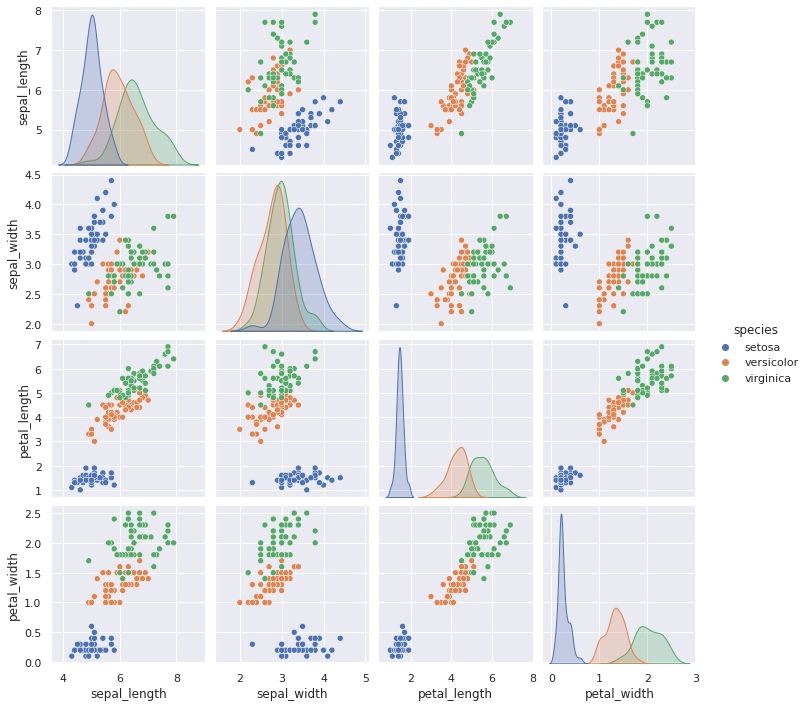

In [65]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Display summary statistics for the whole dataset
iris.describe()

### 2.1 Your turn! (15 points)
Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
2. Plot the resulting decision tree. 
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. 


**Answer 2.1**

The default setting per scikit.learn.org for decisiontreeclassifier is as follows:

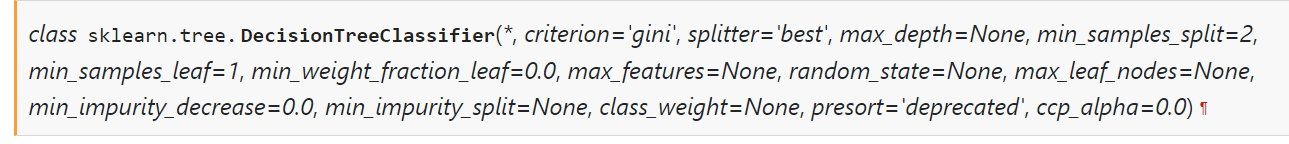

Section 2.1 is answered in three step codes below.

**Step 1**: Confirming the default setting for decisiontreeclassifier

**Step 2**: Plotting the decision tree.

**Step 3**: Perform k-fold validation with k=3

In [71]:
# Step 1 -----------default settings

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
clf=DecisionTreeClassifier(random_state=0)
iris=load_iris()

clf.fit(iris.data,iris.target)
clf.score(iris.data, iris.target)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


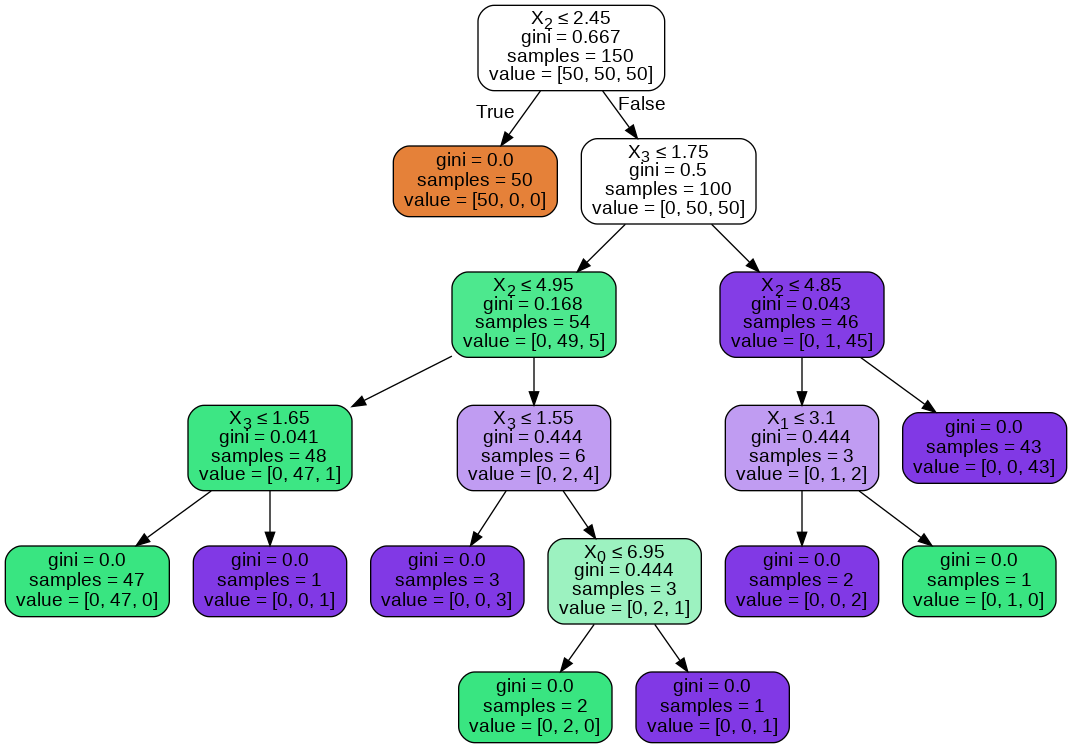

In [73]:
# Step 2--------------plotting the decision tree

df=pd.DataFrame(iris.data,columns=iris.feature_names)
y=iris.target
dtree=DecisionTreeClassifier()
dtree.fit(df,y)
sns.reset_orig()

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data, filled=True, rounded= True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [72]:
#Step 3 -----------k-fold validation with k=3

from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0)
iris=load_iris()
cross_val_score(clf,iris.data,iris.target,cv=3)

array([0.98, 0.94, 0.98])

### 2b. Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [74]:
from keras.datasets import mnist

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [75]:
X_train.shape

(60000, 28, 28)

In [76]:
y_train.shape

(60000,)

In [77]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

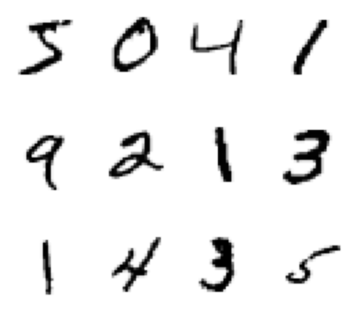

In [78]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [79]:
X_valid.shape

(10000, 28, 28)

In [80]:
y_valid.shape

(10000,)

In [81]:
y_valid[0]

7

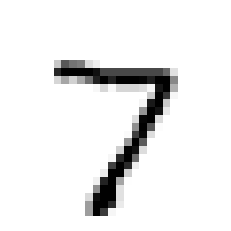

In [82]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [83]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [84]:
# convert class vectors to binary class matrices
y_training = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_valid, num_classes)

In [85]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### 2.2 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix.

Hint: your accuracy will be around 83.5%

In [104]:
# Answer 2.2

from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()
modelNB.fit(X_training, y_train)
pred_labels=modelNB.predict(X_validation)

In [88]:
pred_labels.shape

(10000,)

In [89]:
print(pred_labels)

[7 2 1 ... 9 8 6]


In [90]:
print(y_valid)

[7 2 1 ... 4 5 6]


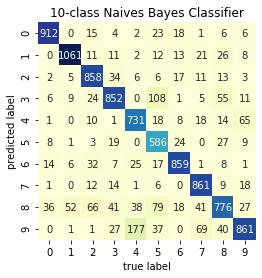

In [105]:
#10-class Naives BAyes classifier - resulting confusion matrix and predictions on test data

from sklearn.metrics import confusion_matrix
import seaborn as sns

matrix=confusion_matrix(y_valid, pred_labels)
sns.heatmap(matrix.T, square=True, annot=True, fmt= 'd', cbar=False, cmap='YlGnBu')
plt.title('10-class Naives Bayes Classifier')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [106]:
from sklearn.metrics import accuracy_score
NB_accuracy=accuracy_score(y_valid, pred_labels)
print("Naive Bayes accuracy score is","{:.2%}".format(NB_accuracy))

Naive Bayes accuracy score is 83.57%


### 2.3 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: your accuracy should be > 90%

In [107]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=0)
modelRF.fit(X_training, y_train)
pred_labels=modelRF.predict(X_validation)

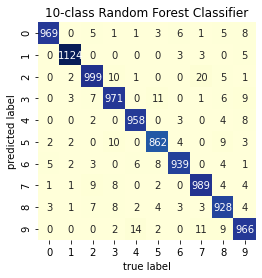

In [108]:
matrix1=confusion_matrix(y_valid, pred_labels)
sns.heatmap(matrix1.T, square=True, annot=True, fmt= 'd', cbar=False, cmap='YlGnBu')
plt.title('10-class Random Forest Classifier')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [109]:
RF_accuracy=accuracy_score(y_valid, pred_labels)
print("Random Forest accuracy score is", "{:.2%}".format(RF_accuracy))

Random Forest accuracy score is 97.05%


### 2.4 Your turn! (10 points)

Write code to: 

1. Build and fit a 10-class classifier of your choice, with sensible initialization options, and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: A variation of the Random Forests classifier from 2.2 above is acceptable. In that case, document your selection of (hyper)parameters and your rationale for choosing them.

**Answer 2.4**

For this section I chose the NEural Network MLPClassifier. I tried using different parameters with respect to Multi-layer perceptions like number of hidden layers, alpha and solver, but the default settings worked the best, improving the accuracy from that used in Random Forests.

In [110]:
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier()
modelNN.fit(X_training, y_train)
pred_labels=modelNN.predict(X_validation)

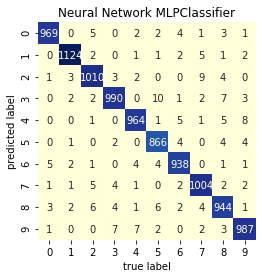

In [111]:
matrix2=confusion_matrix(y_valid, pred_labels)
sns.heatmap(matrix2.T, square=True, annot=True, fmt= 'd', cbar=False, cmap='YlGnBu')
plt.title('Neural Network MLPClassifier')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [115]:
NN_accuracy=accuracy_score(y_valid, pred_labels)
print("Neural Network accuracy score is", "{:.2%}".format(NN_accuracy))

Neural Network accuracy score is 97.96%


In [118]:
print('''Comparison of accuracy for different Classifiers
Naive Bayes       :''',"{:.2%}".format(NB_accuracy),'''
Random Forest     :''',"{:.2%}".format(RF_accuracy),'''
Neural Network MLP:''',"{:.2%}".format(NN_accuracy))


Comparison of accuracy for different Classifiers
Naive Bayes       : 83.57% 
Random Forest     : 97.05% 
Neural Network MLP: 97.96%


## Part 3: Face Recognition using PCA (eigenfaces)

In this part you will build a face recognition solution.

We will use a subset of the Labeled Faces in the Wild (LFW) people dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

The Python code below loads a dataset of 1867 images (resized to 62 $\times$ 47 pixels) from the dataset and displays some of them.

In [119]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


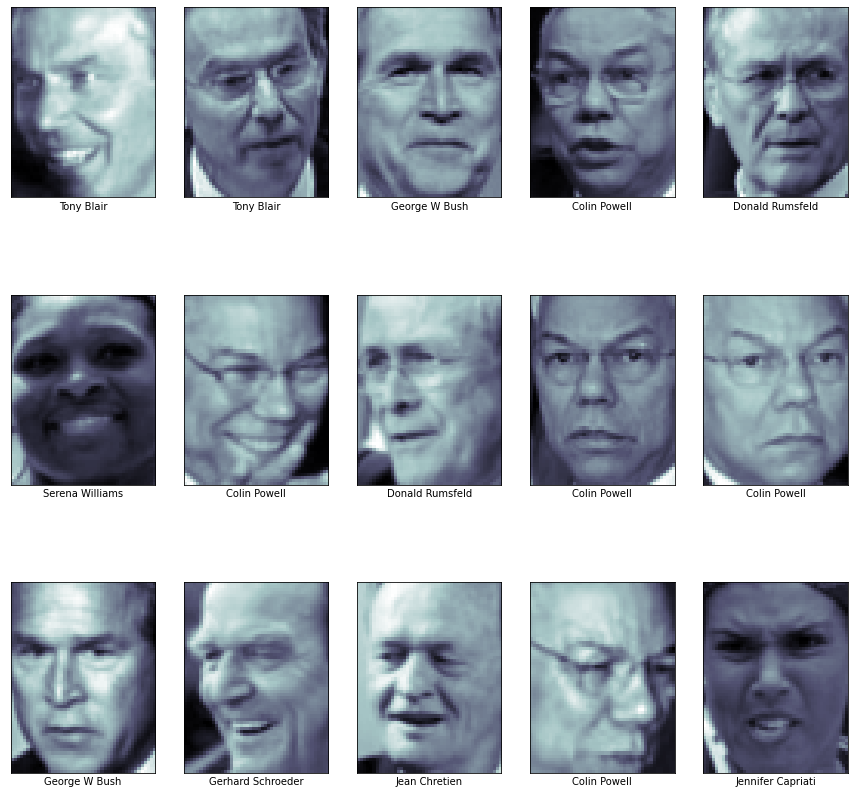

In [120]:
plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#### 3.1 Your turn! (15 points)

Write code to: 

1. Use Principal Component Analysis (PCA) to reduce the dimensionality of each face to the first 120 components. 
2. Build and fit a multi-class SVM classifier, with sensible initialization options, and using the PCA-reduced  features. 
3. Make predictions on the test data, compute the precision, recall and f1 score for each category, compute the overall accuracy, and plot the resulting confusing matrix. 
4. Display examples of correct and incorrect predictions (at least 5 of each). 

**Answer 3.1 - Done in parts mentioned above**

In [121]:
# Part 1:  Reducing dimensionality using PCA to 120 --- n_components =120

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# building svm classifier

pca= PCA(n_components=120, whiten=True, random_state=0)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca,svc)

pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=0,
    svd_solver='auto', tol=0.0, whiten=True)

In [122]:

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state =0)

In [ ]:
#Fitting svm classifier to training data
model.fit(Xtrain, ytrain)

In [125]:
yfit = model.predict(Xtest)

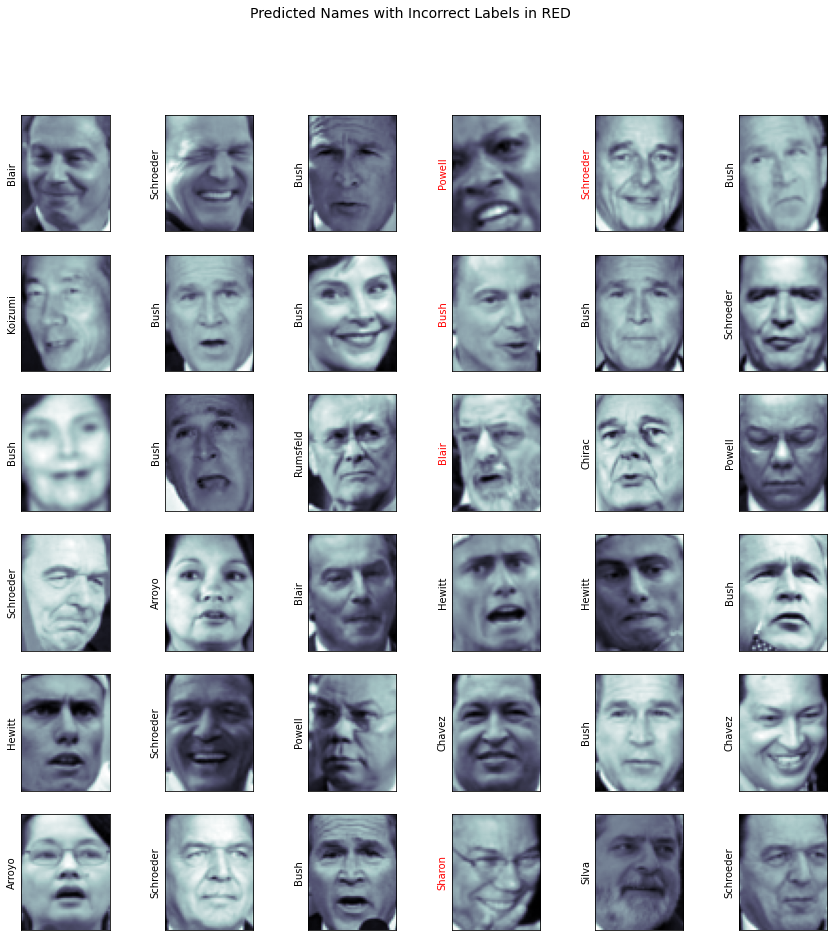

In [127]:
## Making predictions

plt.rcParams["figure.figsize"]=15,15
fig, ax = plt.subplots(6,6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names with Incorrect Labels in RED', size=14);


In [131]:
# Display of precision, recall, and accuracy

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))
print("Overall accuracy is:", "{:.0%}".format(accuracy_score(ytest, yfit)))

                           precision    recall  f1-score   support

             Ariel Sharon       0.67      0.67      0.67        18
    Arnold Schwarzenegger       0.25      0.08      0.12        13
             Colin Powell       0.57      0.83      0.68        54
          Donald Rumsfeld       0.77      0.85      0.81        27
            George W Bush       0.78      0.89      0.83       131
        Gerhard Schroeder       0.77      0.80      0.79        30
  Gloria Macapagal Arroyo       1.00      0.73      0.84        11
              Hugo Chavez       0.94      0.68      0.79        25
           Jacques Chirac       0.71      0.45      0.56        11
            Jean Chretien       1.00      0.55      0.71        11
        Jennifer Capriati       1.00      0.50      0.67        12
            John Ashcroft       0.86      0.38      0.52        16
        Junichiro Koizumi       1.00      0.86      0.93        22
               Laura Bush       1.00      0.64      0.78     

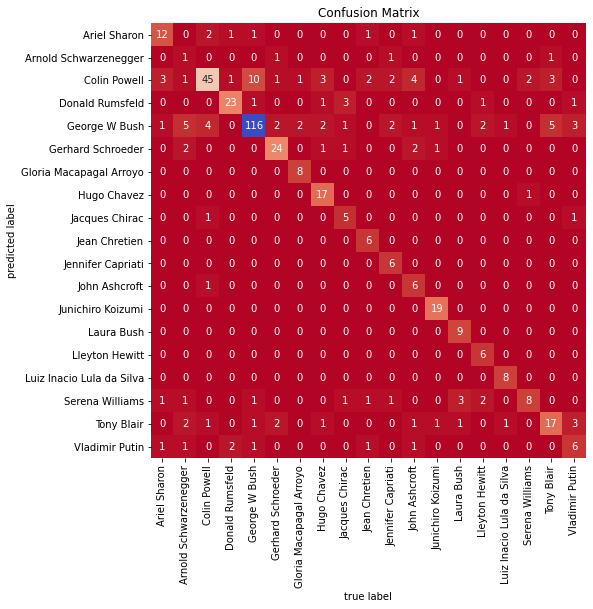

In [132]:
# Plotting the confusion matrix

plt.rcParams["figure.figsize"]=8,8

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names, cmap="coolwarm_r" )
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label');

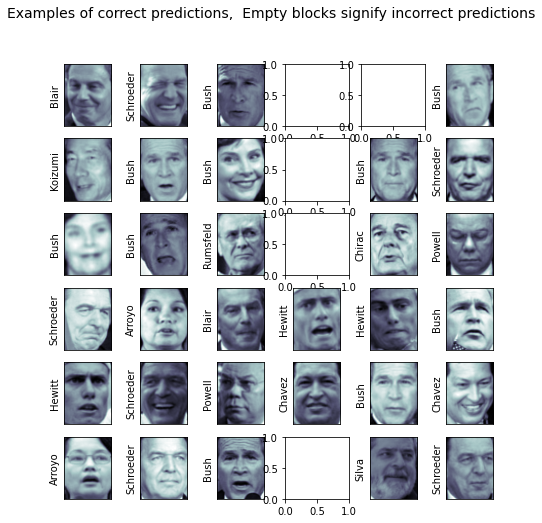

In [144]:
## Display examples of correct and incorrect predictions (at least 5 of each).

fig, ax = plt.subplots(6,6)


for i, axi in enumerate(ax.flat):
    if (yfit[i] == ytest[i]):
        axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(faces.target_names[yfit[i]].split()[-1])
      #  return ('predicted: %s\ntrue:      %s' % (pred_name, true_name))

#prediction_titles = [title(y_pred, y_test, target_names, i)
#                    for i in range(y_pred.shape[0])]

#plot_gallery(X_test, prediction_titles, h, w)

fig.suptitle('Examples of correct predictions,  Empty blocks signify incorrect predictions', size=14);




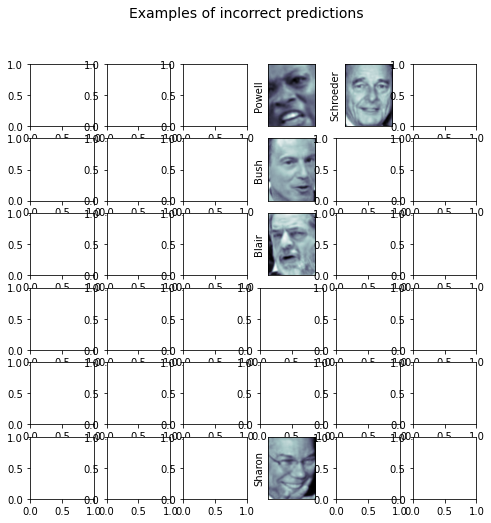

In [139]:
fig, ax = plt.subplots(6,6)

for i, axi in enumerate(ax.flat):
    if (yfit[i] != ytest[i]):
        axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
        axi.set(xticks=[], yticks=[])
        axi.set_ylabel(faces.target_names[yfit[i]].split()[-1])
      #  return ('predicted: %s\ntrue:      %s' % (pred_name, true_name))

#prediction_titles = [title(y_pred, y_test, target_names, i)
#                    for i in range(y_pred.shape[0])]

#plot_gallery(X_test, prediction_titles, h, w)

fig.suptitle('Examples of incorrect predictions, Empty blocks signify correct predictions', size=14);

### Conclusions (10 points)

Write your conclusions and make sure to address the issues below:

**What have you learned from this assignment?**

I have learned to apply machine learning concepts using python. Having done a Data Mining class earlier, I knew the concepts but had no idea how they could be applied in Python. Discovering how parameters can be tweaked by building code from scratch was a good experience.

**Which parts were the most fun, time-consuming, enlightening, tedious?**

The most fun part was tweaking and playing around with parameters. This, however, ended up to be time-consuming too since there is no end to this process and I got into the rabbithole once in a while. The most tedious task was to understand each term for each classifier from scikit-learn.org. I am still in the early stages.

This assignment was challenging and without Professor's class in which he explains the codes, I would not have been able to write any codes from scratch. Hence, I give full credit to Prof. Oge for my codes on this assignment.

**What would you do if you had an additional week to work on this?**

Try to work out a method of saving all my trials by building models so that they could be saved for future reference to understand how changing one or more parameters affects the performance of a model.